In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta
import plotly.express as px

In [ ]:
sns.set(
    font_scale=2,
    style="whitegrid",
    rc={'figure.figsize':(20,7)}
        )

In [ ]:
avocado_mean = pd.read_csv("https://stepik.org/media/attachments/lesson/362453/avocado_mean.csv",
                           index_col=0, squeeze=True, parse_dates=['Date'])

<ipython-input-3-05af10063a2f>:1: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  avocado_mean = pd.read_csv("https://stepik.org/media/attachments/lesson/362453/avocado_mean.csv",


In [ ]:
avocado_mean.index

DatetimeIndex(['2015-01-04', '2015-01-11', '2015-01-18', '2015-01-25',
               '2015-02-01', '2015-02-08', '2015-02-15', '2015-02-22',
               '2015-03-01', '2015-03-08',
               ...
               '2018-01-21', '2018-01-28', '2018-02-04', '2018-02-11',
               '2018-02-18', '2018-02-25', '2018-03-04', '2018-03-11',
               '2018-03-18', '2018-03-25'],
              dtype='datetime64[ns]', name='Date', length=169, freq=None)

In [ ]:
avocado_mean.head()

Date
2015-01-04    1.301296
2015-01-11    1.370648
2015-01-18    1.391111
2015-01-25    1.397130
2015-02-01    1.247037
Name: AveragePrice, dtype: float64

In [ ]:
avocado_mean.rolling(3).mean().max().round(2)

1.85

In [ ]:
nums = [2, 4, 10, 50]

<ipython-input-8-4785fdc61631>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[row][col].set_xticklabels(avocado_mean.index, rotation=45)


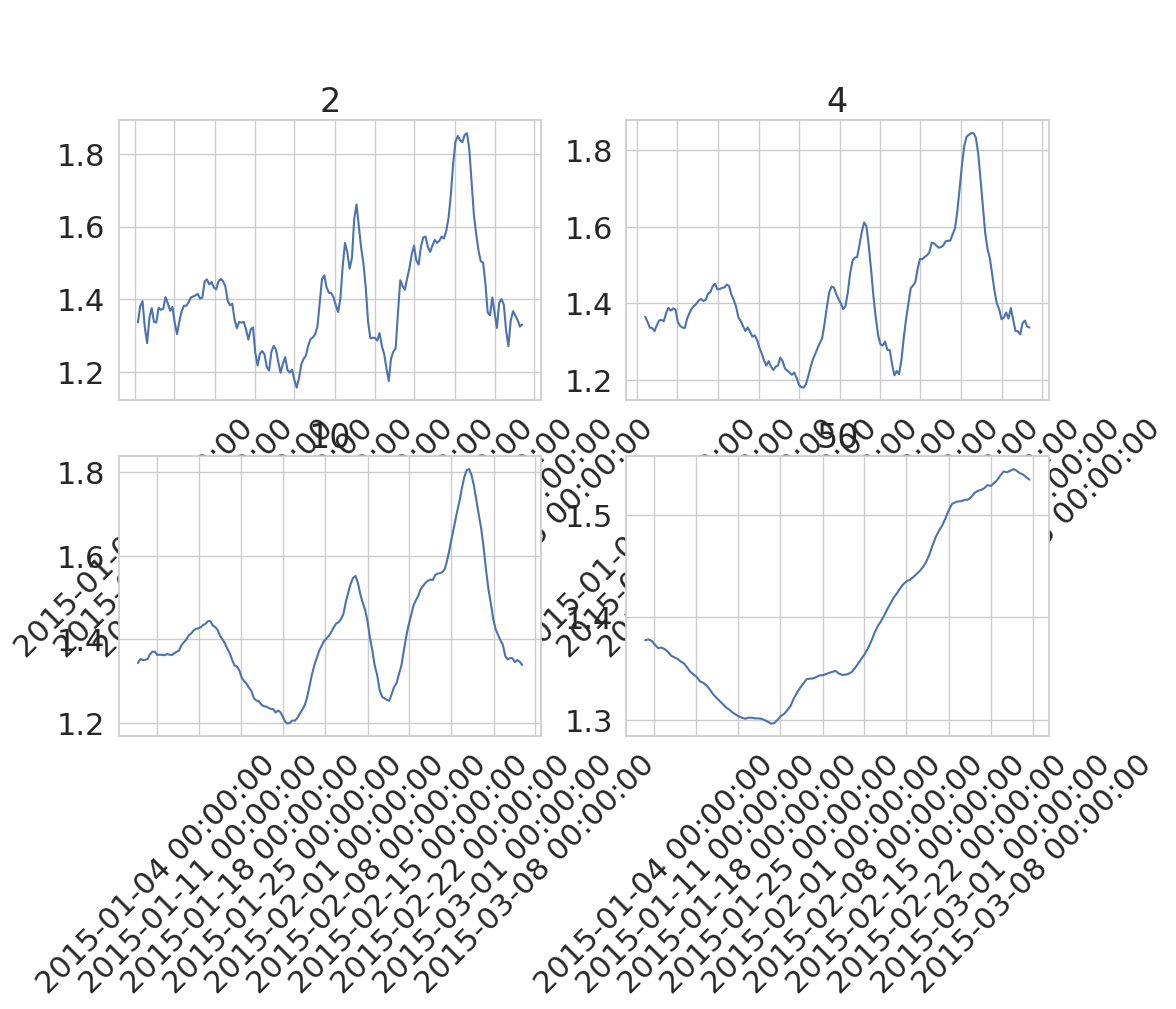

In [ ]:
#plt.figure(figsize=(100, 20))

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
index = 0
for row in range(2):
  for col in range(2):
    ax[row][col].plot(avocado_mean.rolling(nums[index]).mean())
    ax[row][col].set_title(f'\n\n{nums[index]}')
    ax[row][col].set_xticklabels(avocado_mean.index, rotation=45)
    index += 1

plt.show()

In [ ]:
avocado_ewm = avocado_mean.ewm(span=2).mean()

In [ ]:
avocado_ewm

Date
2015-01-04    1.301296
2015-01-11    1.353310
2015-01-18    1.379480
2015-01-25    1.391394
2015-02-01    1.294758
                ...   
2018-02-25    1.356212
2018-03-04    1.352194
2018-03-11    1.340793
2018-03-18    1.322734
2018-03-25    1.338812
Name: AveragePrice, Length: 169, dtype: float64

In [ ]:
avocado_mean

Date
2015-01-04    1.301296
2015-01-11    1.370648
2015-01-18    1.391111
2015-01-25    1.397130
2015-02-01    1.247037
                ...   
2018-02-25    1.359630
2018-03-04    1.350185
2018-03-11    1.335093
2018-03-18    1.313704
2018-03-25    1.346852
Name: AveragePrice, Length: 169, dtype: float64

In [ ]:
full_avocado = pd.read_csv('https://stepik.org/media/attachments/lesson/362453/avocado_full.csv', index_col=0, parse_dates=['Date'])

In [ ]:
full_avocado.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Date,,,,,,,,,,,,
2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.0,organic,2015,Southeast
2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.0,organic,2015,Chicago
2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.0,organic,2015,HarrisburgScranton
2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.0,conventional,2015,Pittsburgh
2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.0,organic,2015,Boise


In [ ]:
avg_price_org_chicago = full_avocado[(full_avocado['type'] == 'organic') & (full_avocado['region'] == 'Chicago')]['AveragePrice']

<Axes: xlabel='Date', ylabel='AveragePrice'>

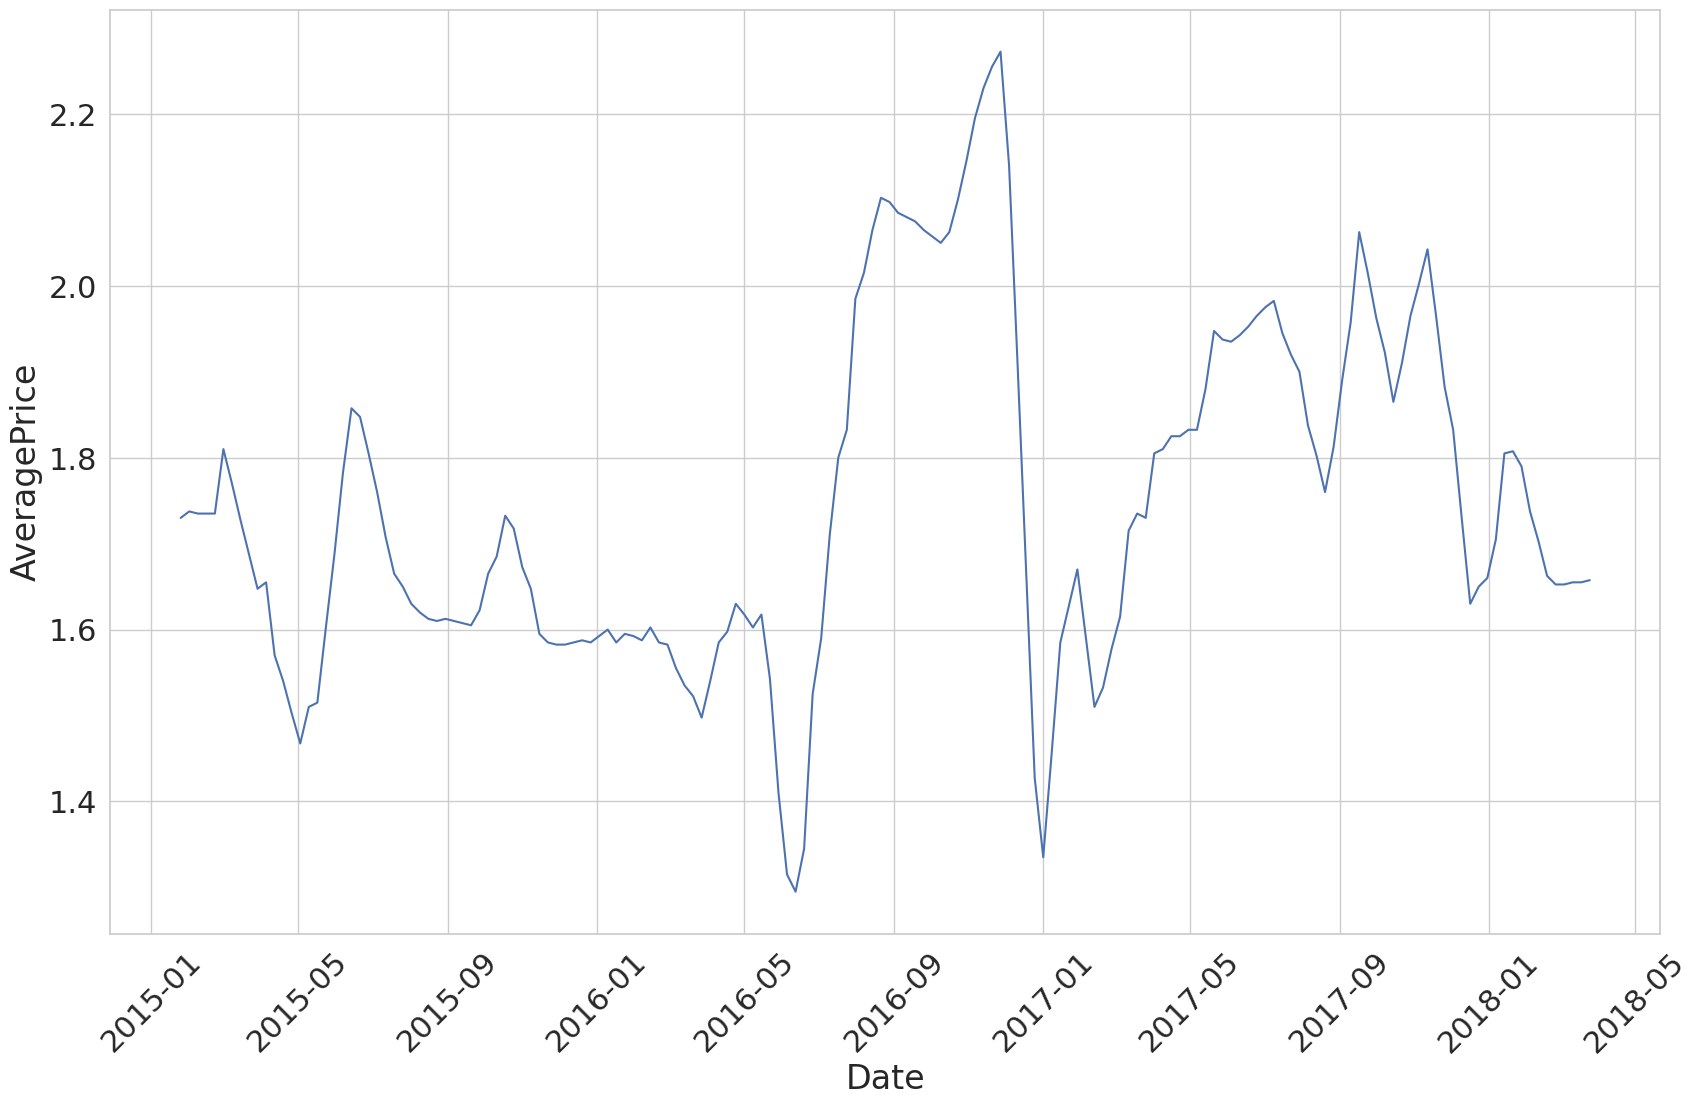

In [ ]:
plt.figure(figsize=(20, 12))
plt.xticks(rotation=45)
sns.lineplot(avg_price_org_chicago.rolling(4).mean())



<Axes: xlabel='Date', ylabel='AveragePrice'>

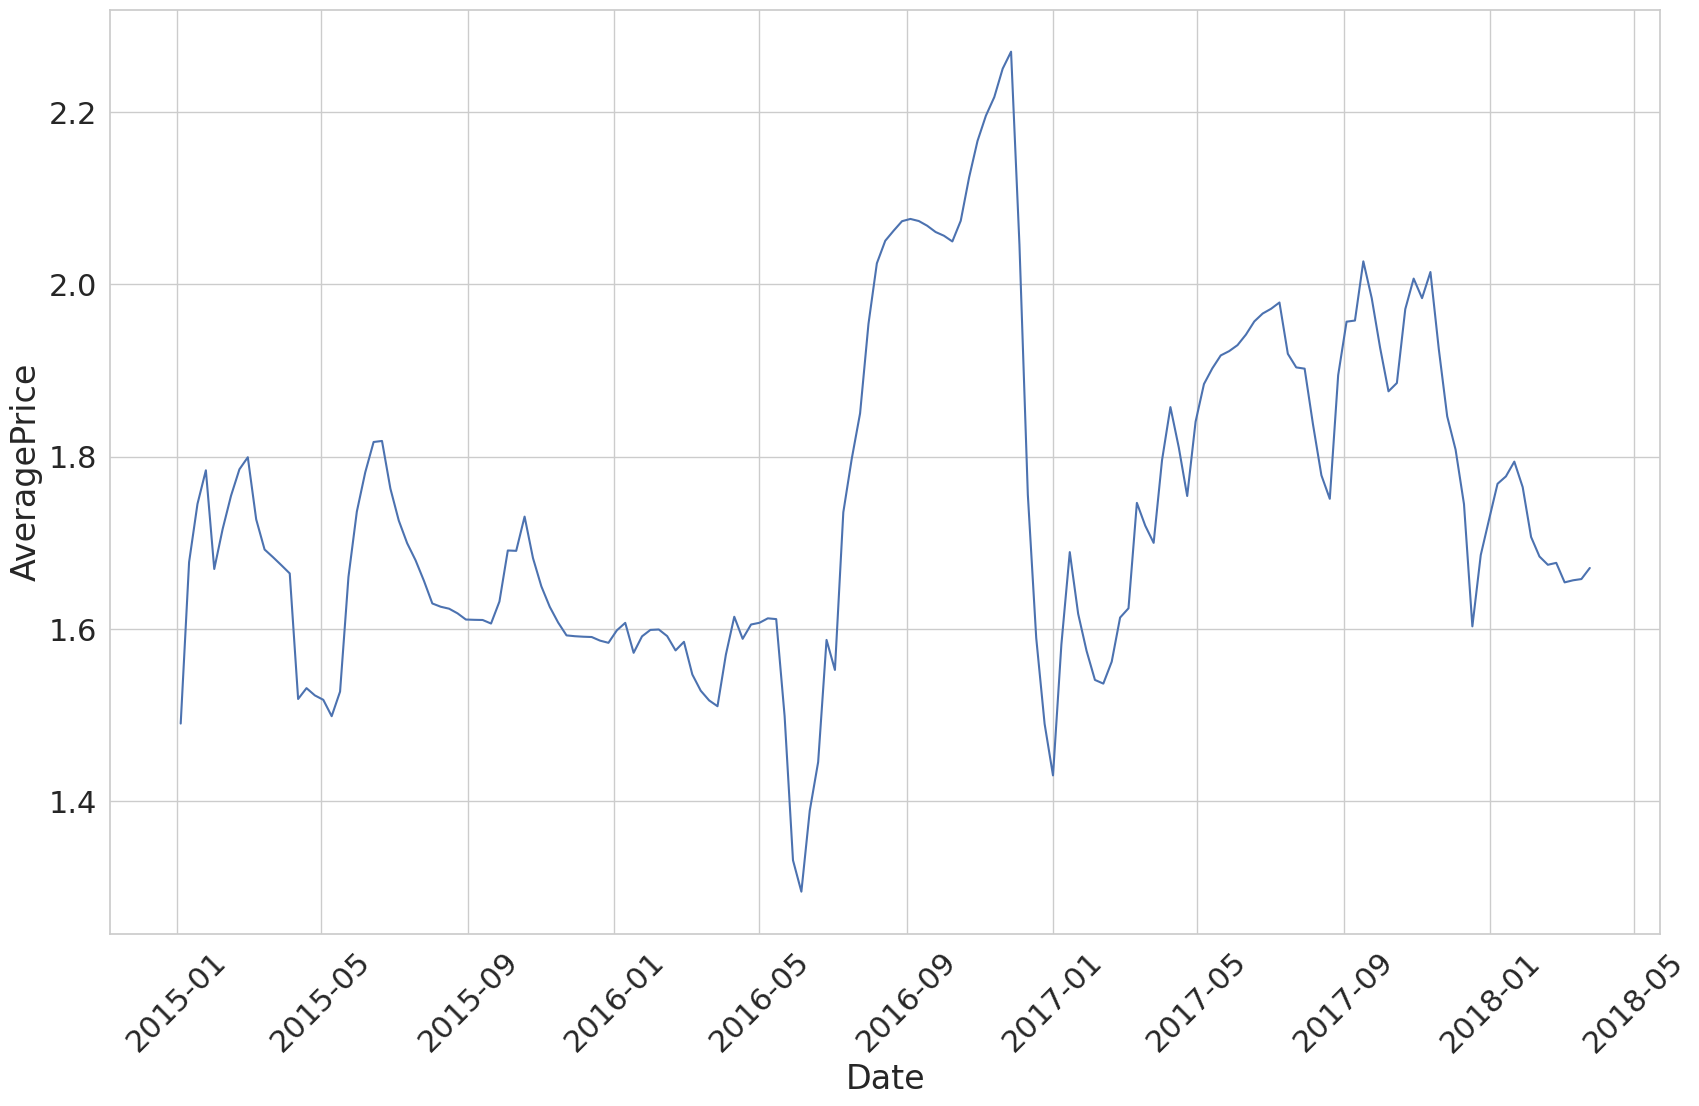

In [ ]:
plt.figure(figsize=(20, 12))
plt.xticks(rotation=45)
sns.lineplot(avg_price_org_chicago.ewm(span=4).mean())

<Axes: xlabel='Date'>

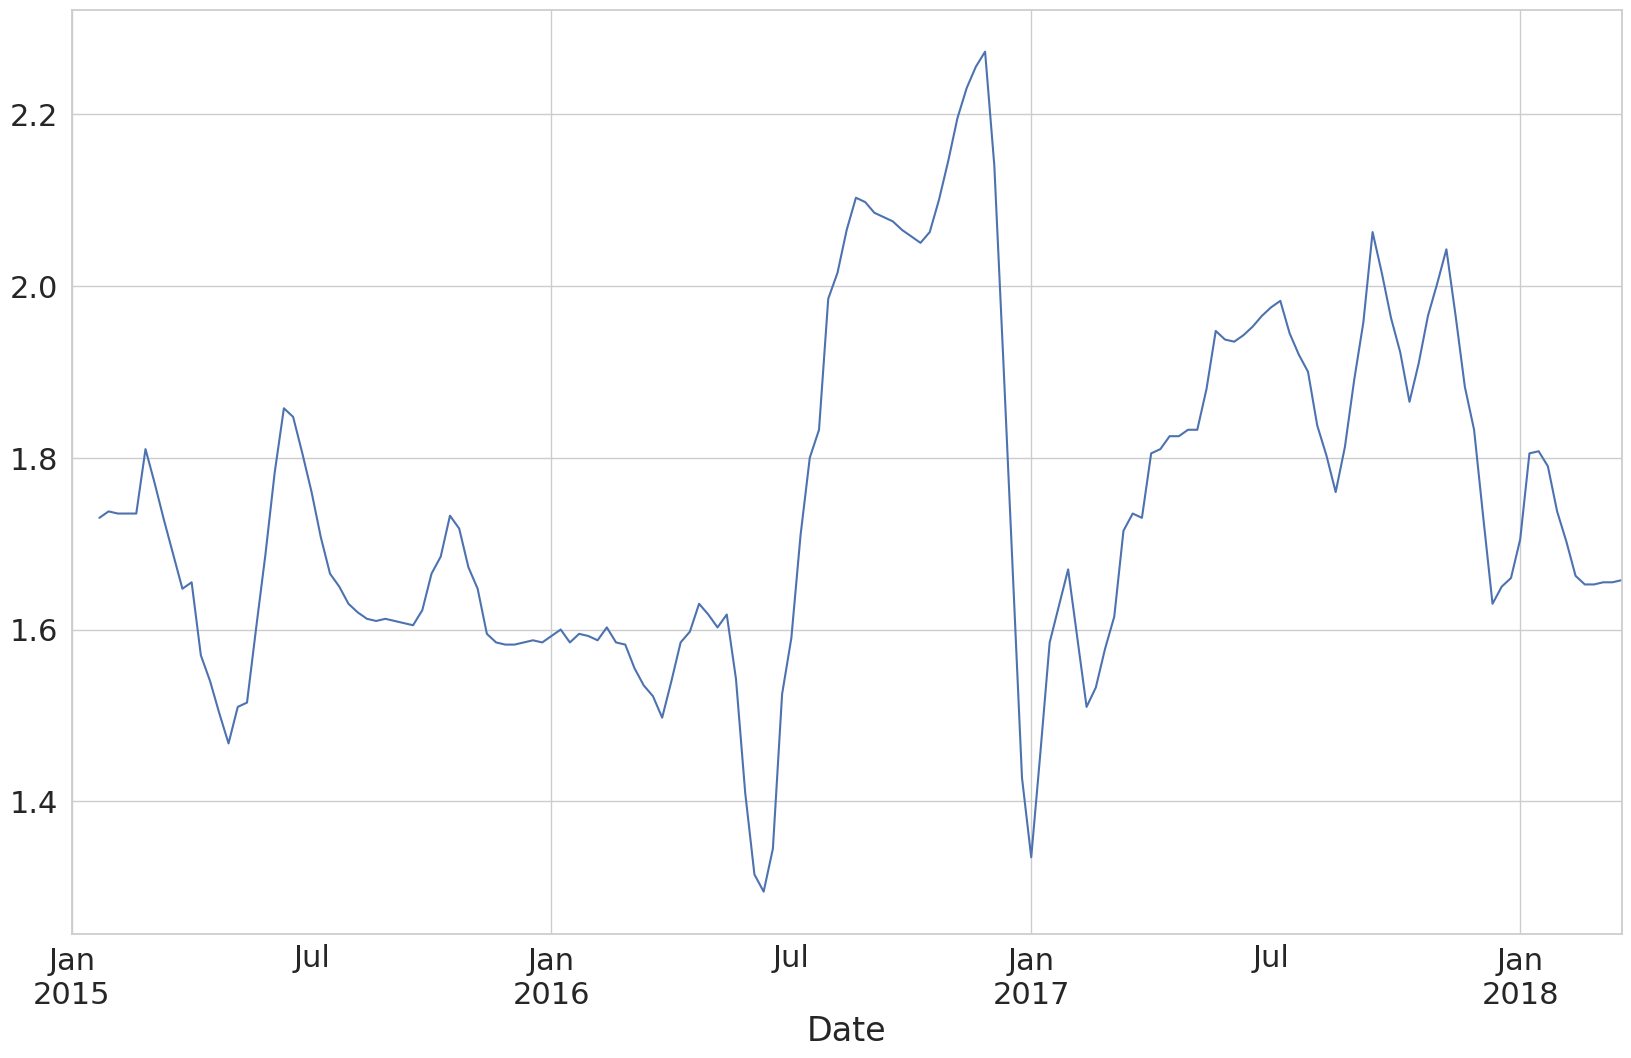

In [ ]:
plt.figure(figsize=(20, 12))
plt.xticks(rotation=45)
avg_price_org_chicago.rolling(4).mean().plot()

<Axes: xlabel='Date'>

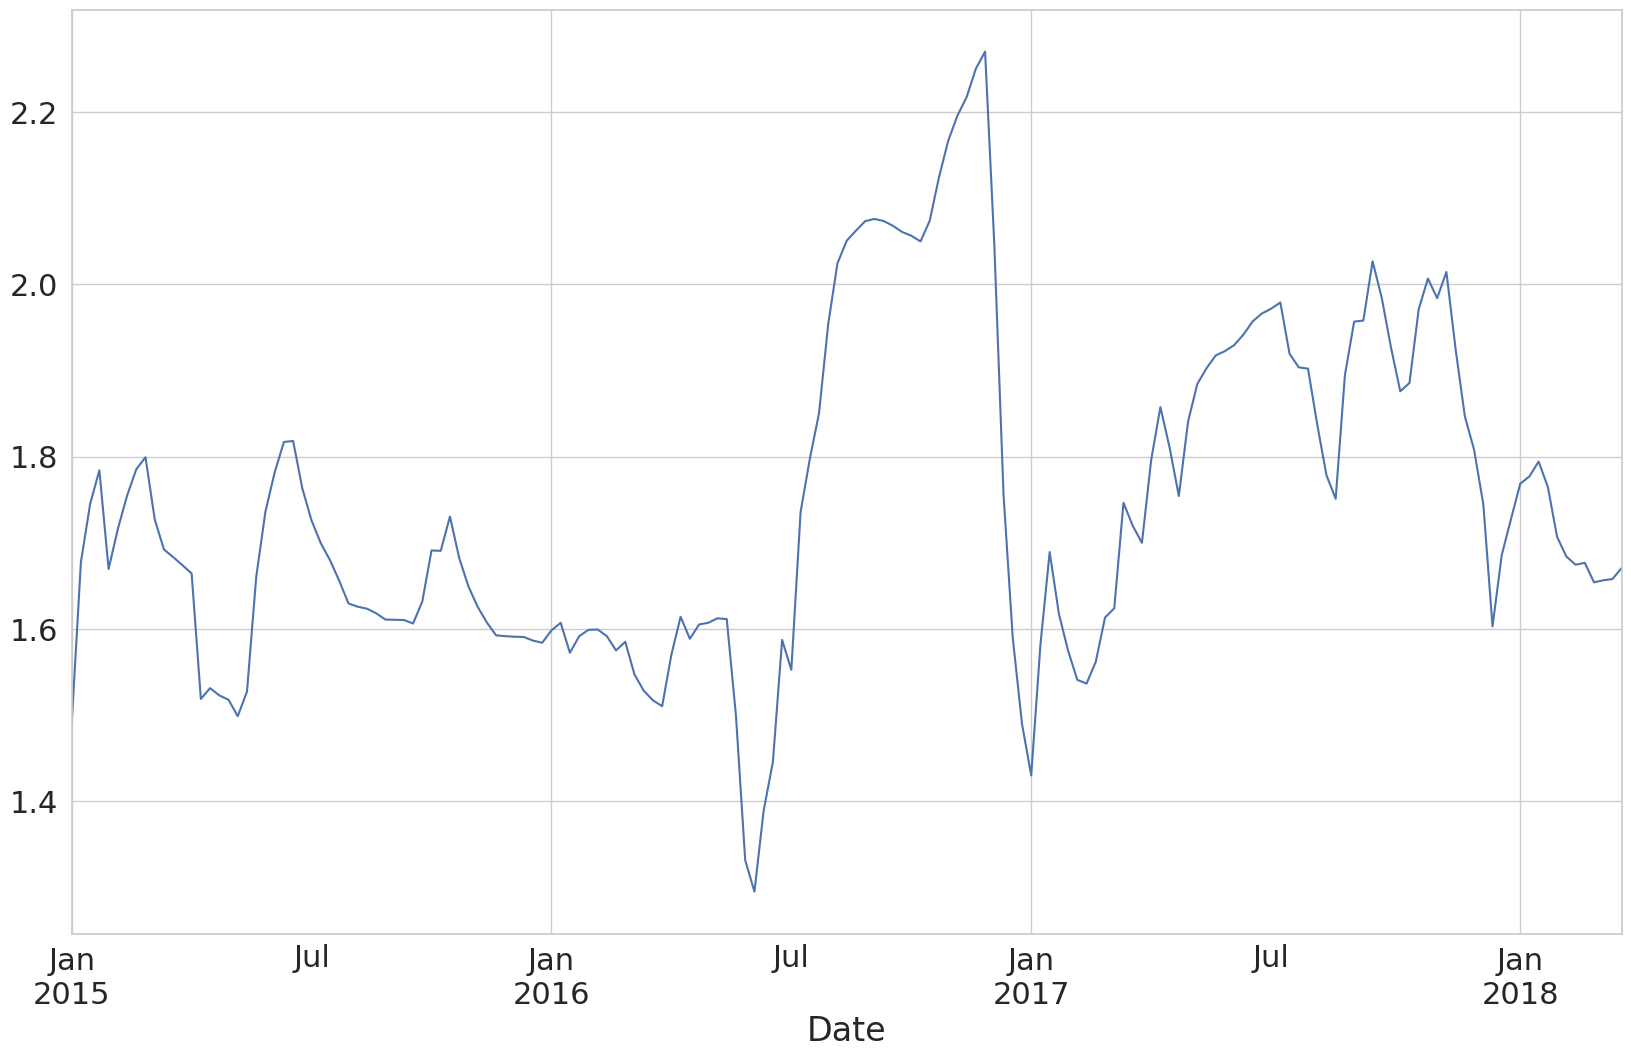

In [ ]:
plt.figure(figsize=(20, 12))
plt.xticks(rotation=45)
avg_price_org_chicago.ewm(span=4).mean().plot()

In [ ]:
avg_rol_price = avg_price_org_chicago.rolling(4).mean().fillna(0).reset_index()

In [ ]:
avg_ewm_price = avg_price_org_chicago.ewm(span=4).mean().fillna(0).reset_index()

In [ ]:
avg_rol_price[avg_rol_price['Date'] == '2016-08-21']

,Date,AveragePrice
85,2016-08-21,2.1025


In [ ]:
avg_ewm_price[avg_ewm_price['Date'] == '2016-08-21']

,Date,AveragePrice
85,2016-08-21,2.062428


In [ ]:
avg_ewm_price[avg_ewm_price['Date'] == '2017-02-19']

,Date,AveragePrice
111,2017-02-19,1.561849


In [ ]:
avg_rol_price[avg_rol_price['Date'] == '2017-02-19']

,Date,AveragePrice
111,2017-02-19,1.5325


### 💀 Сложное задание! 💀
### Далее будем работать с данными по опозданиям в заключении сделок.

In [ ]:
df = pd.read_csv('https://stepik.org/media/attachments/course/72204/delays.csv')

In [ ]:
df.dtypes

client_id      int64
company_id     int64
delay         object
revenue        int64
dtype: object

In [ ]:
df.head()

,client_id,company_id,delay,revenue
0,2389,4240,-1 days -14:57:48.000000000,705436
1,7614,9544,-4 days -02:14:23.000000000,859266
2,2052,2427,-0 days -06:08:57.000000000,812416
3,9635,8054,-0 days -23:40:19.000000000,162312
4,8154,5503,-1 days -13:21:53.000000000,658844


In [ ]:
df['delay'] = pd.to_timedelta(df['delay'].str.replace('-', ''))

In [ ]:
df.head()

,client_id,company_id,delay,revenue
0,2389,4240,1 days 14:57:48,705436
1,7614,9544,4 days 02:14:23,859266
2,2052,2427,0 days 06:08:57,812416
3,9635,8054,0 days 23:40:19,162312
4,8154,5503,1 days 13:21:53,658844


In [ ]:
df.dtypes

client_id               int64
company_id              int64
delay         timedelta64[ns]
revenue                 int64
dtype: object

In [ ]:
df['delay_categorical'] = pd.cut(df['delay'], 
                                 [timedelta(days=0), timedelta(days=1), timedelta(days=2), timedelta(days=3), timedelta(days=100)], 
                                 right=True, 
                                 labels=['less than 1 day', '1-2 days', '2-3 days', 'more than 3 days'])

In [ ]:
df

,client_id,company_id,delay,revenue,delay_categorical
0,2389,4240,1 days 14:57:48,705436,1-2 days
1,7614,9544,4 days 02:14:23,859266,more than 3 days
2,2052,2427,0 days 06:08:57,812416,less than 1 day
3,9635,8054,0 days 23:40:19,162312,less than 1 day
4,8154,5503,1 days 13:21:53,658844,1-2 days
...,...,...,...,...,...
259,5837,2617,0 days 05:32:08,602129,less than 1 day
260,2384,2364,3 days 23:27:14,910660,more than 3 days
261,5146,3331,1 days 15:22:34,401137,1-2 days
262,7203,5532,2 days 17:15:02,308979,2-3 days


In [ ]:
df_delay = df.groupby('delay_categorical', as_index=False).agg({'revenue': 'count'}).sort_values('revenue', ascending=False).rename(columns={'revenue': 'dalay_count'})

In [ ]:
df_delay

,delay_categorical,dalay_count
3,more than 3 days,107
0,less than 1 day,59
1,1-2 days,51
2,2-3 days,47


In [ ]:
fig = px.bar(df_delay, x="delay_categorical", y="dalay_count")
fig.show()

# Минипроект

Перед вами данные взаимодействий с рекламными объявлениями на некоторой площадке за 6 дней. И таблица с характеристиками рекламных клиентов (тех, кто разместил эти объявления).

Задачи
Разберемся с распределением количества показов и кликов. Посчитайте среднее количество показов и среднее количество кликов на объявления за весь период (округлите до целых).
Нарисуйте график распределения показов на объявление за весь период.
Давайте посчитаем скользящее среднее показов с окном 2. Какое значение скользящего среднего получим за 6 апреля 2019 года (ответ округлите до целых)?
Скользящее среднее часто используется для поиска аномалий в данных. Давайте попробуем нанести на один график значения арифметического среднего по дням и скользящего среднего количества показов. В какой день наблюдается наибольшая разница по модулю между арифметическим средним и скользящим средним? Дни, в которых скользящее среднее равно NaN, не учитываем. 
*Напишите функцию, которая найдет проблемное объявление (с наибольшим/наименьшим количеством показов) в день, в который была замечена самая большая по модулю аномалия. 
Теперь подгрузим данные по рекламным клиентам и найдем среднее количество дней от даты создания рекламного клиента и первым запуском рекламного объявления этим клиентом.
Вычислите конверсию из создания рекламного клиента в запуск первой рекламы в течение не более 365 дней. Ответ дайте в процентах и округлите до сотых. (Фильтровать нужно по значению в формате pd.Timedelta(365, unit='d'))
Давайте разобъем наших клиентов по промежуткам от создания до запуска рекламного объявления, равным 30. Определите, сколько уникальных клиентов запустили свое первое объявление в первый месяц своего существования (от 0 до 30 дней). Список промежутков для метода pd.cut – [0, 30, 90, 180, 365]
А теперь – выведем на интерактивный график эти категории с количеством уникальных клиентов в них.

In [ ]:
!wget https://stepik.org/media/attachments/course/72204/ads.zip

--2023-04-08 08:49:15--  https://stepik.org/media/attachments/course/72204/ads.zip
Resolving stepik.org (stepik.org)... 185.206.166.110
Connecting to stepik.org (stepik.org)|185.206.166.110|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4414358 (4.2M) [application/zip]
Saving to: ‘ads.zip’

ads.zip             100%[===================>]   4.21M  4.01MB/s    in 1.0s    

2023-04-08 08:49:17 (4.01 MB/s) - ‘ads.zip’ saved [4414358/4414358]



In [ ]:
!unzip '/content/ads.zip'

Archive:  /content/ads.zip
  inflating: ads_clients_data.csv    
  inflating: ads_data.csv            


In [ ]:
ads_data = pd.read_csv('/content/ads_data.csv', parse_dates=['date', 'time'])
ads_clients = pd.read_csv('/content/ads_clients_data.csv', parse_dates=['date', 'create_date'])

In [ ]:
ads_data.head()

,date,time,event,platform,ad_id,client_union_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count
0,2019-04-01,2019-04-01 00:00:48,view,android,45061,34734,45061,CPM,200.6,0,1955269
1,2019-04-01,2019-04-01 00:00:48,view,web,121288,121288,121288,CPM,187.4,0,232011
2,2019-04-01,2019-04-01 00:01:03,view,android,102737,102535,102564,CPC,60.7,0,4410
3,2019-04-01,2019-04-01 00:01:03,view,android,107564,106914,107564,CPM,217.3,0,62711
4,2019-04-01,2019-04-01 00:01:09,view,android,4922,37,4400,CPC,60.1,0,1183501


In [ ]:
ads_data.dtypes

date                     datetime64[ns]
time                     datetime64[ns]
event                            object
platform                         object
ad_id                             int64
client_union_id                   int64
campaign_union_id                 int64
ad_cost_type                     object
ad_cost                         float64
has_video                         int64
target_audience_count             int64
dtype: object

In [ ]:
ads_events = ads_data.groupby(['ad_id', 'event'], as_index=False).agg({'platform': 'count'}) \
.pivot(index='ad_id', columns='event', values='platform').fillna(0).reset_index()


In [ ]:
ads_events[['click', 'view']].mean().round()

event
click    113.0
view     923.0
dtype: float64

/usr/local/lib/python3.9/dist-packages/pandas/core/arraylike.py:397: RuntimeWarning:

divide by zero encountered in log



<Axes: xlabel='view', ylabel='Count'>

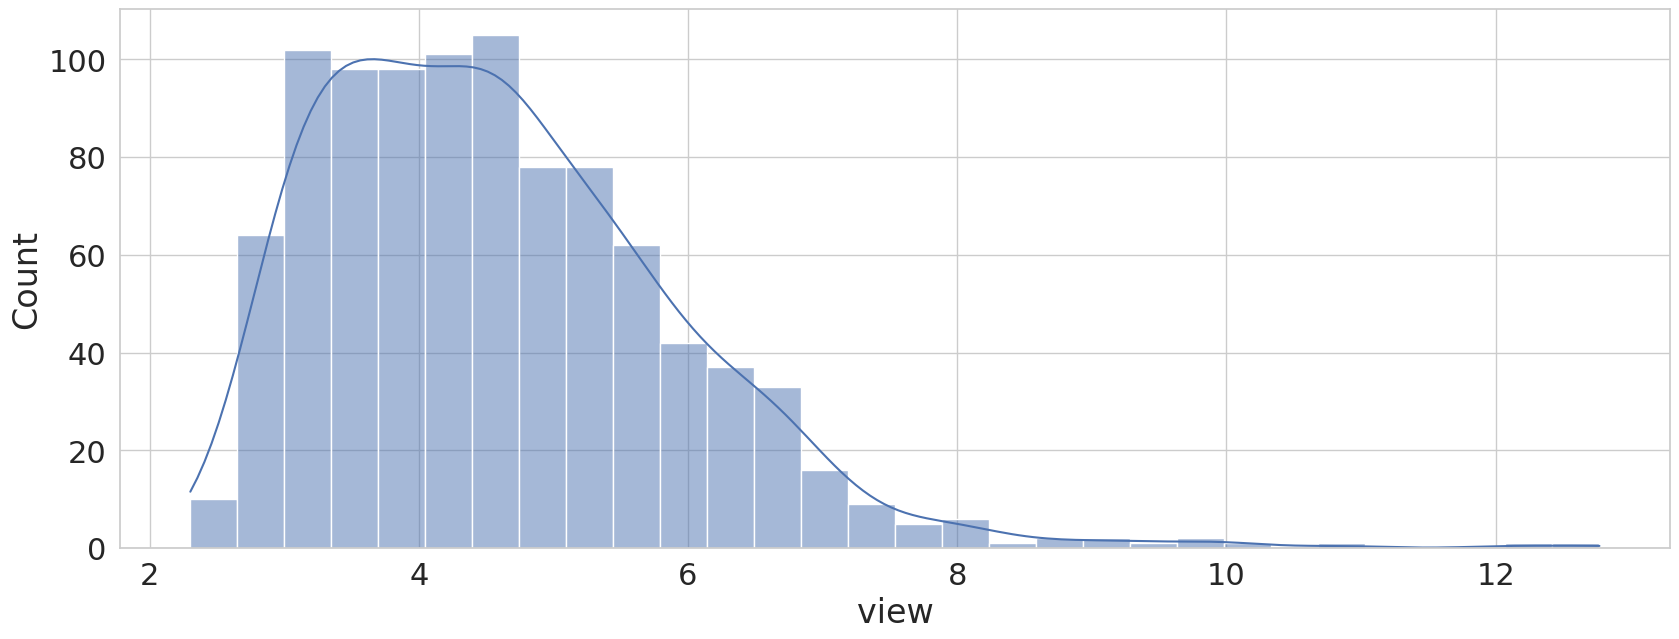

In [ ]:
sns.histplot(np.log(ads_events['view']), kde=True)

In [ ]:
ads_data_mean = ads_data[ads_data['event'] == 'view'].groupby(['ad_id', 'date'], as_index=False) \
.agg({'ad_cost_type': 'count'}).groupby('date').agg({'ad_cost_type': 'mean'})

In [ ]:
ads_data_rolling = ads_data[ads_data['event'] == 'view'].groupby(['ad_id', 'date'], as_index=False) \
.agg({'ad_cost_type': 'count'}).groupby('date').agg({'ad_cost_type': 'mean'}).rolling(2).mean()

In [ ]:
ads_data_rolling.head()

,ad_cost_type
date,
2019-04-01,NaN
2019-04-02,146.134626
2019-04-03,150.869880
2019-04-04,419.927249
2019-04-05,797.505699


<Axes: xlabel='date'>

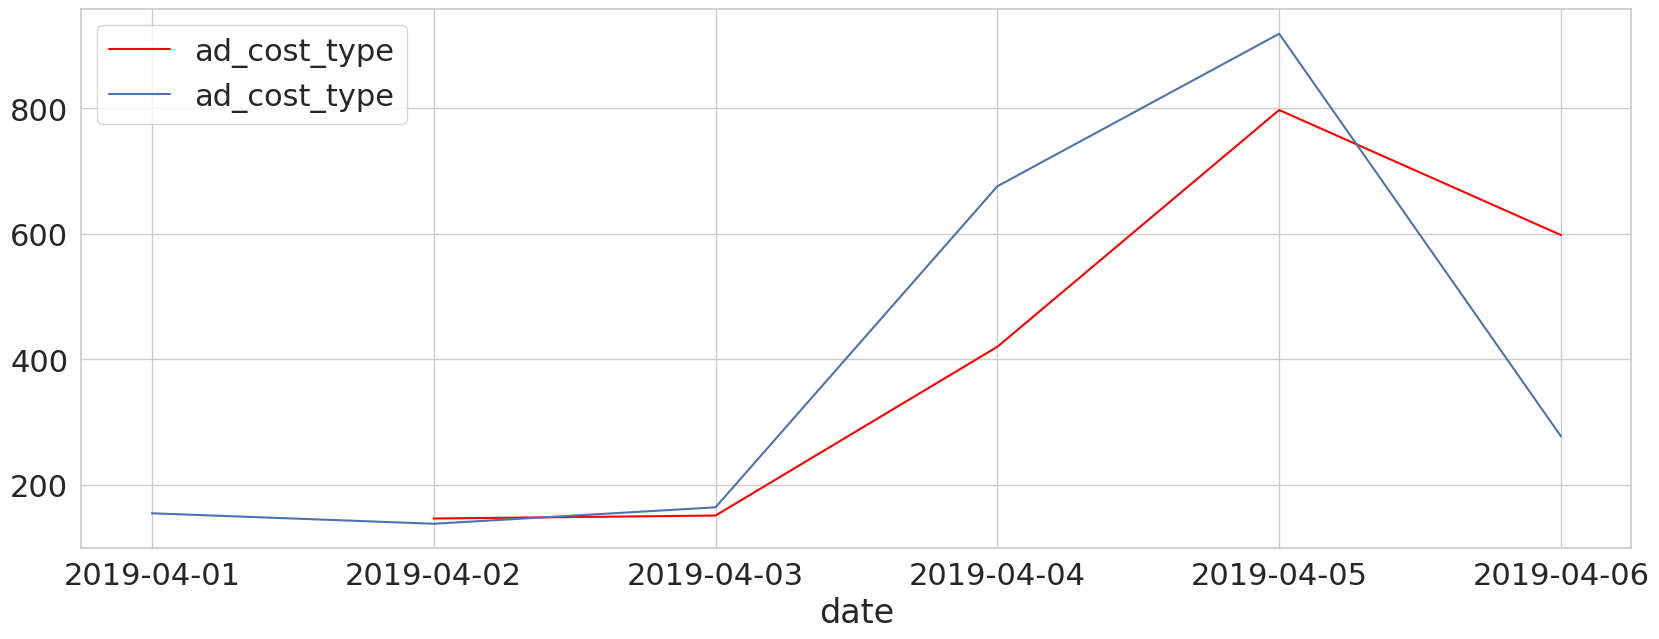

In [ ]:
sns.lineplot(ads_data_rolling, palette=['red'])
sns.lineplot(ads_data_mean)

In [ ]:
ads_clients['client_union_id'].nunique()

122078

In [ ]:
ads_data.head()

,date,time,event,platform,ad_id,client_union_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count
0,2019-04-01,2019-04-01 00:00:48,view,android,45061,34734,45061,CPM,200.6,0,1955269
1,2019-04-01,2019-04-01 00:00:48,view,web,121288,121288,121288,CPM,187.4,0,232011
2,2019-04-01,2019-04-01 00:01:03,view,android,102737,102535,102564,CPC,60.7,0,4410
3,2019-04-01,2019-04-01 00:01:03,view,android,107564,106914,107564,CPM,217.3,0,62711
4,2019-04-01,2019-04-01 00:01:09,view,android,4922,37,4400,CPC,60.1,0,1183501


In [ ]:
ads_union = ads_data.merge(ads_clients, on='client_union_id')

In [ ]:
ads_union.head(1)

,date_x,time,event,platform,ad_id,client_union_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count,date_y,community_id,create_date
0,2019-04-01,2019-04-01 00:00:48,view,android,45061,34734,45061,CPM,200.6,0,1955269,2020-05-07,-130129582,2018-12-04


In [ ]:
ads_union['time_delta'] = ads_union['date_x'] - ads_union['create_date']

In [ ]:
ads_union.groupby('client_union_id').agg({'time_delta': 'min'}).mean()

time_delta   124 days 09:04:43.532219570
dtype: timedelta64[ns]

### 💀 Сложное задание! 💀

Давайте вычислим конверсию из создания рекламного кабинета в запуск первой рекламы в течение не более 365 дней.

Конверсия – отношение числа клиентов, которые совершили целевое действие (создали рекламу), к общему числу клиентов. Например, 1000 клиентов создали кабинет, но лишь 50 из них запустили рекламу. В таком случае конверсия будет равна

1000
50
​
 ∗100=5%

Чтобы отобрать данные за нужный промежуток, можно воспользоваться сравнением времени до создания первой рекламы с pd.Timedelta(365, unit='day')



In [ ]:
ads_union['date_x'].isna().sum()

0

In [ ]:
ads_union.head()

,date_x,time,event,platform,ad_id,client_union_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count,date_y,community_id,create_date,time_delta
0,2019-04-01,2019-04-01 00:00:48,view,android,45061,34734,45061,CPM,200.6,0,1955269,2020-05-07,-130129582,2018-12-04,118 days
1,2019-04-01,2019-04-01 00:03:28,view,android,45061,34734,45061,CPM,200.6,0,1955269,2020-05-07,-130129582,2018-12-04,118 days
2,2019-04-01,2019-04-01 00:04:58,view,ios,45061,34734,45061,CPM,200.6,0,1955269,2020-05-07,-130129582,2018-12-04,118 days
3,2019-04-01,2019-04-01 00:10:23,view,ios,45061,34734,45061,CPM,200.6,0,1955269,2020-05-07,-130129582,2018-12-04,118 days
4,2019-04-01,2019-04-01 00:15:42,view,android,45061,34734,45061,CPM,200.6,0,1955269,2020-05-07,-130129582,2018-12-04,118 days


In [ ]:
ads_union_td = ads_union.groupby('client_union_id', as_index=False).agg({'time_delta': 'min'})

In [ ]:
ads_union_td[ads_union_td['time_delta'] <= timedelta(days=365)]

,client_union_id,time_delta
0,1,98 days
1,9,114 days
2,13,66 days
3,16,105 days
4,20,32 days
...,...,...
833,122004,67 days
834,122013,151 days
835,122023,126 days
836,122031,96 days


In [ ]:
ads_union['client_union_id'].nunique()

838

In [ ]:
838 / 122078 * 100

0.6864463703533806

### Давайте разобъем наших клиентов по промежуткам от создания рекламного кабинета до запуска первого рекламного объявления.

Определите, сколько уникальных клиентов запустили свое первое объявление в первый месяц своего существования (от 0 до 30 дней). Список промежутков дней для метода pd.cut() – [0, 30, 90, 180, 365]. Создать временные промежутки можно с помощью pd.to_timedelta().

In [ ]:
ads_union_td['month_cut'] = pd.cut(ads_union_td['time_delta'], pd.to_timedelta(['0d', '30d', '90d', '180d', '365d']), labels=['0-30', '30-90', '90-180', '180-365'])

In [ ]:
ads_union_td.head()

,client_union_id,time_delta,month_cut
0,1,98 days,90-180
1,9,114 days,90-180
2,13,66 days,30-90
3,16,105 days,90-180
4,20,32 days,30-90


In [ ]:
ads_union_td['month_cut'].value_counts()

90-180     396
30-90      263
180-365    168
0-30        11
Name: month_cut, dtype: int64

In [ ]:
barplot_df = ads_union_td.groupby('month_cut', as_index=False).agg({'client_union_id': 'count'}).sort_values('client_union_id', ascending=False)

In [ ]:
barplot_df

,month_cut,client_union_id
2,90-180,396
1,30-90,263
3,180-365,168
0,0-30,11


In [ ]:
fig = px.bar(barplot_df, x='month_cut', y='client_union_id')
fig.show()

# Дополнительное задание

В данном проекте вы поработаете с довольно нетипичными для аналитика данными: gff файлом, который описывает геном мухи (описание формата можно найти здесь). При его выполнении вам может понадобиться часть конспекта про работу со строковыми данными, а именно – про строковые методы серий.

Задачи
Выделите из колонки attributes значение атрибута Parent. Т.е. если там записано Parent=x, то нам нужен x
Выясните, какое из этих значений является самым частым
Постройте распределение встречаемости значений в столбце type

In [2]:
!pip install gffpandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.8/178.8 KB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for gffpandas: filename=gffpandas-1.2.0-py2.py3-none-any.whl size=6264 sha256=bfbcaff382784b6de12c83bfb098e67bb2a3864a06550cfa54bf1836a953049f
  Stored in directory: /root/.cache/pip/wheels/49/2d/df/341f05d7aaa4b75eb04049747d83a848a5bf2e7c5f0042a695
Successfully built gffpandas


In [23]:
import gffpandas.gffpandas as gffpd
import re

In [7]:
fly_gen = gffpd.read_gff3('/content/drive/MyDrive/Karpov_Courses/data/gff.tsv')

In [16]:
fly_gen.to_csv('fly_gen.csv')

In [18]:
df_fly = pd.read_csv('/content/fly_gen.csv')

In [21]:
headers = df_fly.iloc[0]
df_fly = df_fly[1:]
df_fly.columns = headers

In [22]:
df_fly.head()

,seq_id,source,type,start,end,score,strand,phase,attributes
1,chr17,RefSeq,exon,6811330,6811453,.,+,.,Parent=XM_001475631.1
2,chr17,RefSeq,CDS,6808204,6808245,.,+,0,Name=CDS:NC_000083.5:LOC100040603;Parent=XM_00...
3,chr17,RefSeq,CDS,6811792,6811869,.,+,2,Name=CDS:NC_000083.5:LOC100040603;Parent=XM_00...
4,chr17,RefSeq,exon,6806513,6806553,.,+,.,Parent=XM_001475631.1
5,chr17,RefSeq,five_prime_UTR,6806513,6806526,.,+,.,Parent=XM_001475631.1


In [24]:
df_fly.tail()

,seq_id,source,type,start,end,score,strand,phase,attributes
508,chr17,RefSeq,exon,6812219,6818159,.,+,.,Parent=XM_001475631.1
509,chr17,RefSeq,protein,6806527,6812289,.,+,.,ID=;Parent=XM_001475631.1
510,chr17,RefSeq,CDS,6806527,6806553,.,+,0,Name=CDS:NC_000083.5:LOC100040603;Parent=XM_00...
511,chr17,RefSeq,exon,6811792,6811869,.,+,.,Parent=XM_001475631.1
512,chr17,RefSeq,exon,6806513,6806553,.,+,.,Parent=XM_001475631.1


In [25]:
pattert = re.compile(r'XM_[0-9]{9}\.[0-9]')

In [45]:
df_fly['parent'] = df_fly['attributes'].str.extract(r'Parent=(NC_\d{6}\.\d:\w+|XM_\d{9}\.\d)')

In [48]:
df_fly.head()

,seq_id,source,type,start,end,score,strand,phase,attributes,parent
1,chr17,RefSeq,exon,6811330,6811453,.,+,.,Parent=XM_001475631.1,XM_001475631.1
2,chr17,RefSeq,CDS,6808204,6808245,.,+,0,Name=CDS:NC_000083.5:LOC100040603;Parent=XM_00...,XM_001475631.1
3,chr17,RefSeq,CDS,6811792,6811869,.,+,2,Name=CDS:NC_000083.5:LOC100040603;Parent=XM_00...,XM_001475631.1
4,chr17,RefSeq,exon,6806513,6806553,.,+,.,Parent=XM_001475631.1,XM_001475631.1
5,chr17,RefSeq,five_prime_UTR,6806513,6806526,.,+,.,Parent=XM_001475631.1,XM_001475631.1


In [47]:
df_fly['parent'].value_counts()

XM_001475631.1              479
NC_000083.5:LOC100040603     33
Name: parent, dtype: int64

In [49]:
df_fly['type'].value_counts()

exon               201
CDS                170
five_prime_UTR      47
mRNA                33
three_prime_UTR     32
protein             29
Name: type, dtype: int64

In [51]:
pd.read_csv('/content/drive/MyDrive/Karpov_Courses/data/gff.tsv', comment='"', sep='\s+', header=None)

,0,1,2,3,4,5,6,7,8
0,seq_id,source,type,start,end,score,strand,phase,attributes
1,chr17,RefSeq,exon,6811330,6811453,.,+,.,Parent=XM_001475631.1
2,chr17,RefSeq,CDS,6808204,6808245,.,+,0,Name=CDS:NC_000083.5:LOC100040603;Parent=XM_00...
3,chr17,RefSeq,CDS,6811792,6811869,.,+,2,Name=CDS:NC_000083.5:LOC100040603;Parent=XM_00...
4,chr17,RefSeq,exon,6806513,6806553,.,+,.,Parent=XM_001475631.1
...,...,...,...,...,...,...,...,...,...
508,chr17,RefSeq,exon,6812219,6818159,.,+,.,Parent=XM_001475631.1
509,chr17,RefSeq,protein,6806527,6812289,.,+,.,ID=;Parent=XM_001475631.1
510,chr17,RefSeq,CDS,6806527,6806553,.,+,0,Name=CDS:NC_000083.5:LOC100040603;Parent=XM_00...
511,chr17,RefSeq,exon,6811792,6811869,.,+,.,Parent=XM_001475631.1
